In [1]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [2]:
df=pd.read_csv('SP500_bySectors',index_col=0)

In [3]:
df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [4]:
df=df[['Symbol','GICS Sector','GICS Sub Industry']]
df_tech=df[df['GICS Sector']=='Information Technology']
df_tech.head()

,Symbol,GICS Sector,GICS Sub Industry
4,ACN,Information Technology,IT Consulting & Other Services
6,ADBE,Information Technology,Application Software
7,AMD,Information Technology,Semiconductors
13,AKAM,Information Technology,Internet Services & Infrastructure
20,ADS,Information Technology,Data Processing & Outsourced Services


In [5]:
tech_companies_list=df_tech['Symbol'].values.tolist()

In [6]:
type(tech_companies_list)

list

In [11]:
# Define which online source to use
#data_source = 'yahoo'

# define start and end dates
#start_date = '2015-01-01'
#end_date = '2020-05-01'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
#panel_data = web.DataReader(tech_companies_list, data_source, start_date, end_date)

In [12]:
tech_price_close=pd.read_csv('XLK_Closing_Price',index_col=0)
tech_price_open =pd.read_csv('XLK_Opening_price',index_col=0)

tech_price_close.head()

,AAPL,ACN,ADBE,ADI,ADP,ADS,ADSK,AKAM,AMAT,AMD,...,SWKS,TEL,TXN,V,VRSN,WDC,WU,XLNX,XRX,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,109.330002,88.839996,72.339996,55.540001,83.290001,285.369995,59.529999,63.250000,24.959999,2.67,...,73.320000,63.169998,53.480000,66.254997,57.189999,110.430000,17.930000,43.599998,36.231884,77.430000
2015-01-05,106.250000,87.339996,71.980003,54.529999,83.230003,281.399994,58.660000,61.939999,24.160000,2.66,...,72.129997,61.939999,52.650002,64.792503,56.240002,108.970001,17.760000,42.799999,35.441372,76.339996
2015-01-06,106.260002,86.709999,70.529999,53.250000,82.540001,277.820007,57.500000,60.669998,23.250000,2.63,...,69.830002,61.189999,51.779999,64.375000,55.180000,106.540001,17.730000,42.180000,34.967060,75.790001
2015-01-07,107.750000,88.529999,71.110001,53.810001,83.260002,279.950012,57.380001,60.160000,23.469999,2.58,...,70.980003,63.029999,52.709999,65.237503,55.639999,108.139999,17.559999,42.200001,35.415020,77.720001
2015-01-08,111.889999,89.879997,72.919998,54.759998,85.169998,287.929993,58.799999,61.570000,24.219999,2.61,...,74.199997,64.300003,53.570000,66.112503,56.880001,110.379997,17.910000,43.139999,36.389988,79.379997


In [13]:
tech_price_close.shape

(1342, 71)

In [136]:
tech_daily_returns=np.log(tech_price_close).diff()

In [137]:
tech_daily_returns.drop('NLOK',inplace=True,axis=1)
tech_daily_returns.dropna(inplace=True)
print(tech_daily_returns.shape)
print()
print()
tech_daily_returns.head()

(1141, 70)




,AAPL,ACN,ADBE,ADI,ADP,ADS,ADSK,AKAM,AMAT,AMD,...,SWKS,TEL,TXN,V,VRSN,WDC,WU,XLNX,XRX,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2015-10-20,0.018094,0.003582,-0.017805,0.002985,0.001374,0.003279,-0.008426,0.021077,0.023751,0.004963,...,0.005893,0.008014,-0.003997,-0.009265,0.003834,-0.072389,-0.002624,0.000644,0.003918,-0.009537
2015-10-21,-0.000088,-0.009224,-0.008210,0.022105,0.000343,-0.018172,-0.016872,-0.010623,-0.007440,0.038840,...,-0.007951,-0.043343,-0.010160,-0.010808,-0.017704,-0.046762,0.002100,0.002144,-0.006866,-0.016285
2015-10-22,0.015180,0.037711,0.026693,0.026370,0.025292,0.065098,0.028155,0.019069,0.008674,0.018869,...,0.050463,0.035644,0.112675,0.012642,0.012678,-0.020934,0.030470,0.019933,0.012714,0.010794
2015-10-23,0.030525,0.014269,-0.006806,0.003464,0.009322,0.004675,-0.003810,0.021145,0.014089,0.032187,...,0.010473,0.007229,0.015205,0.008470,0.061334,-0.008902,0.005074,-0.009917,0.004847,0.045606
2015-10-26,-0.032432,-0.000185,0.011092,-0.033403,-0.004650,-0.003216,0.023020,0.017264,-0.006714,-0.027525,...,-0.057850,-0.000470,-0.002886,0.014300,0.003610,-0.031944,-0.006091,0.013480,-0.030439,0.002627


# Clustering Analysis

In [138]:
from sklearn.preprocessing import normalize
data_scaled = normalize(tech_daily_returns,axis=0)
data_scaled = pd.DataFrame(data_scaled, columns=tech_daily_returns.columns,index=tech_daily_returns.index)
data_scaledT=data_scaled.T
del data_scaledT.index.name
data_scaledT.head()

Date,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,...,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01
AAPL,0.029354,-0.000143,0.024627,0.049522,-0.052616,-0.010306,0.065508,0.017049,-0.013924,0.022649,...,-0.034029,-0.050939,0.046069,-0.006300,0.046173,0.001146,-0.026513,0.052430,0.033869,-0.026331
ACN,0.006810,-0.017535,0.071692,0.027127,-0.000352,-0.001762,0.032501,-0.031091,-0.013254,0.007080,...,-0.003804,-0.094800,0.068177,0.006498,0.027941,0.042534,-0.011371,0.095614,-0.024175,-0.053088
ADBE,-0.026585,-0.012258,0.039856,-0.010162,0.016562,-0.013337,0.007612,-0.006425,0.009122,0.020904,...,0.003337,-0.070430,0.034899,-0.006220,0.038371,0.018972,-0.065915,0.068783,0.018994,-0.041962
ADI,0.004390,0.032513,0.038787,0.005095,-0.049132,-0.003350,0.011218,-0.045395,0.003429,0.005373,...,-0.027294,-0.066185,0.083717,-0.004472,0.058211,0.029013,-0.005730,0.076307,-0.049355,-0.082242
ADP,0.002494,0.000623,0.045929,0.016928,-0.008444,0.004428,-0.049314,0.009272,-0.028376,0.000000,...,-0.016291,-0.082500,0.067895,-0.036767,0.043693,0.038585,0.010059,0.035585,0.010553,-0.079327


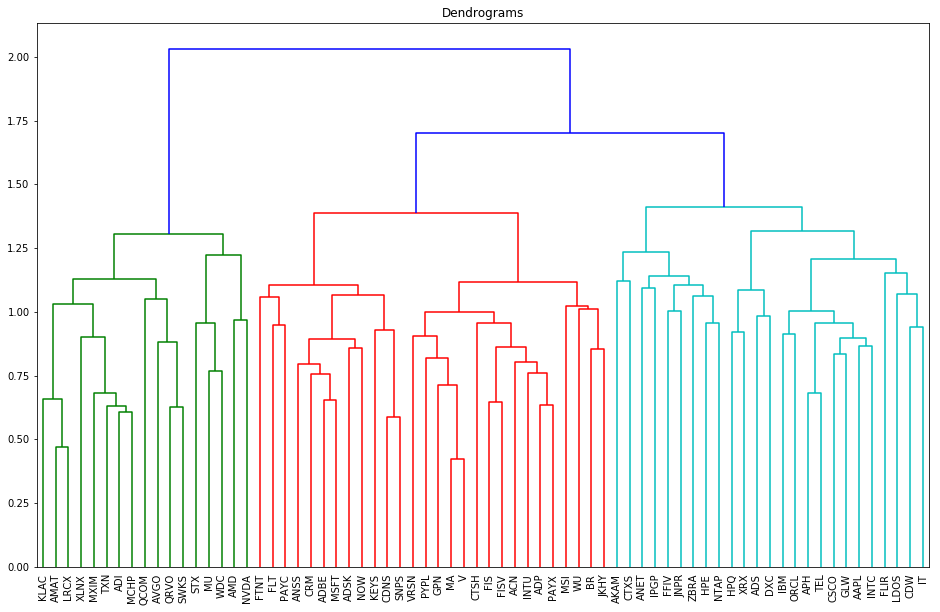

In [139]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaledT, method='ward'),labels=data_scaledT.index,
                      leaf_rotation=90,leaf_font_size=10)

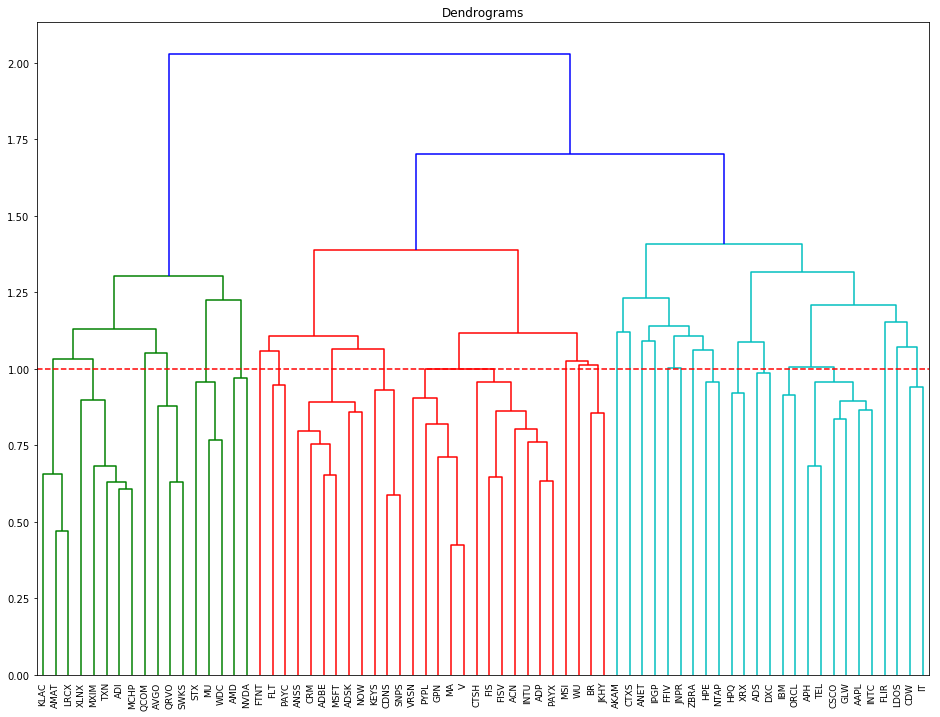

In [140]:
plt.figure(figsize=(16, 12))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaledT, method='ward'),labels=data_scaledT.index,leaf_font_size=9)
plt.axhline(y=1, color='r', linestyle='--')

In [202]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([2, 2, 0, ..., 0, 1, 1], dtype=int64)

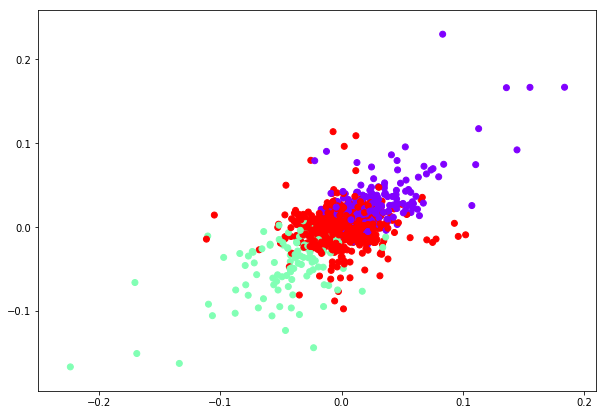

In [203]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled.iloc[:,0], data_scaled.iloc[:,1], c=cluster.labels_, cmap='rainbow')

# PCA Analysis

In [204]:
from sklearn.decomposition import PCA as sklearnPCA

In [205]:
sklearn_pca = sklearnPCA(n_components=10)

In [206]:
pca=sklearn_pca.fit(tech_daily_returns)

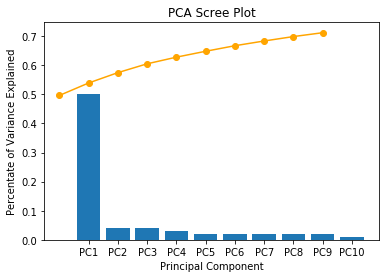

In [207]:
percent_variance = np.round(pca.explained_variance_ratio_, decimals =2)
columns = ["PC"+str(i) for i in range(1,11)]
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='orange',marker='o')
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [208]:
pca_loadings=pd.DataFrame(data=pca.components_,columns=tech_daily_returns.columns)

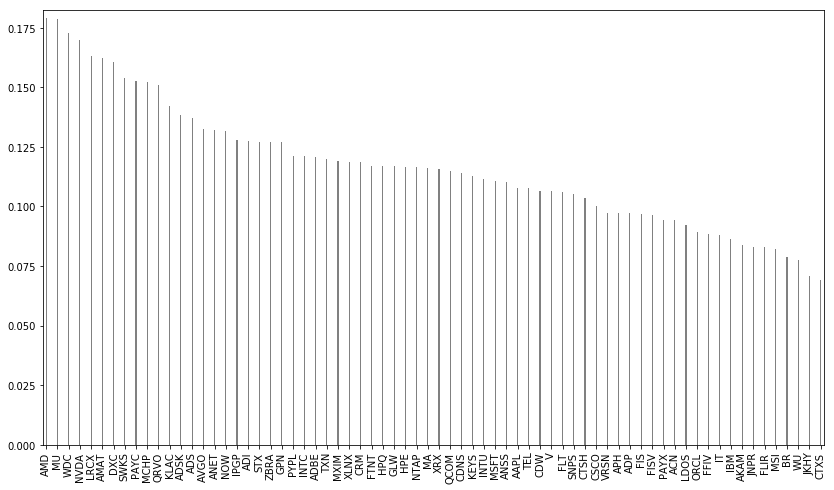

In [220]:
plt.figure(figsize=(12,6))
plt.xticks(rotation='vertical')
plt.margins(0.02)
(pca_loadings.iloc[0]*-1).sort_values(ascending=False).plot.bar(figsize=(14,8),width=0.1,color='grey')
plt.show()

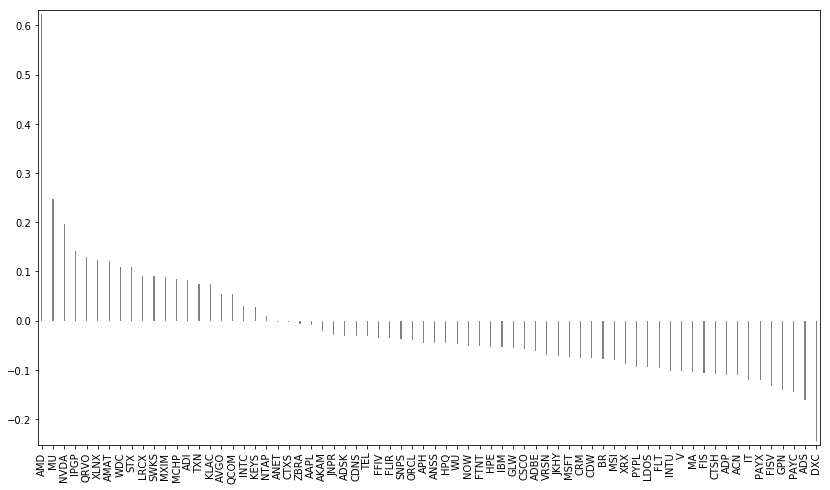

In [221]:
plt.figure(figsize=(12,6))
plt.xticks(rotation='vertical')
plt.margins(0.01)
(pca_loadings.iloc[1]).sort_values(ascending=False).plot.bar(figsize=(14,8),width=0.1,color='grey')
plt.show()

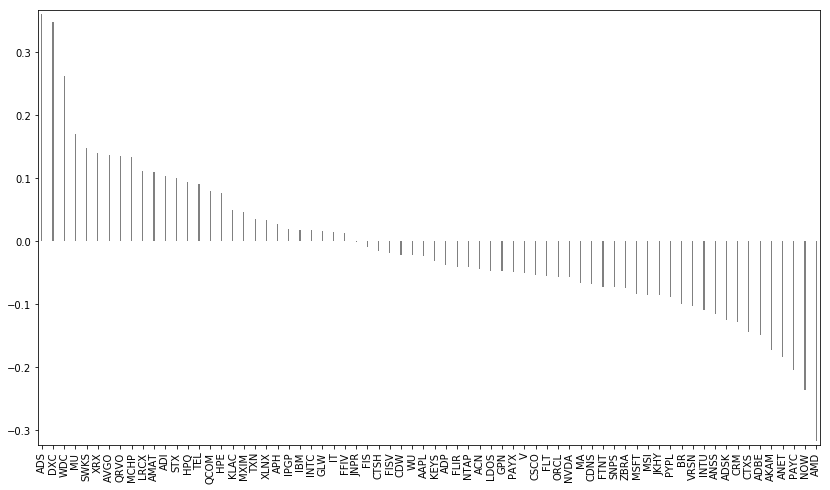

In [211]:
plt.figure(figsize=(14,8))
plt.xticks(rotation='vertical')
plt.margins(0.01)
(pca_loadings.iloc[2]).sort_values(ascending=False).plot.bar(figsize=(14,8),width=0.1,color='grey')

In [307]:
def find_pairs(df):
    "Return a list of pairs with different signs in PC1 and PC2"
    df=df.sort_values(0,axis=1)
    columns=df.columns
    Pairs=[]
    for i in range(len(columns)-1):
        if (df.iloc[0,i]-df.iloc[0,i+1]<=0.001 
            and np.sign(df.iloc[1,i])!=np.sign(df.iloc[1,i+1])
            and np.absolute(df.iloc[1,i]+df.iloc[1,i+1])<=0.05):
            Pairs.append([df.columns[i],df.columns[i+1]])
            
    return Pairs

In [308]:
pairs=find_pairs(pca_loadings)

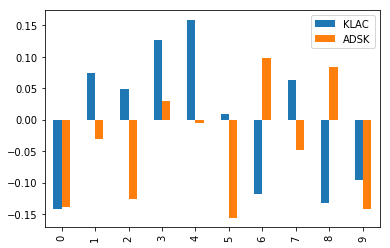

In [309]:
pca_loadings[pairs[0]].plot.bar()

In [310]:
pairs

[['KLAC', 'ADSK'],
 ['INTC', 'ADBE'],
 ['ADBE', 'TXN'],
 ['XLNX', 'CRM'],
 ['HPE', 'NTAP'],
 ['XRX', 'QCOM'],
 ['QCOM', 'CDNS'],
 ['CDNS', 'KEYS']]

In [311]:
pd_pairs=pd.Series(np.array(pairs).flatten().tolist())
pd_pairs.name='Symbol'

In [312]:
pd.merge(pd_pairs,df,on='Symbol')

,Symbol,GICS Sector,GICS Sub Industry
0,KLAC,Information Technology,Semiconductor Equipment
1,ADSK,Information Technology,Application Software
2,INTC,Information Technology,Semiconductors
3,ADBE,Information Technology,Application Software
4,ADBE,Information Technology,Application Software
5,TXN,Information Technology,Semiconductors
6,XLNX,Information Technology,Semiconductors
7,CRM,Information Technology,Application Software
8,HPE,Information Technology,"Technology Hardware, Storage & Peripherals"
9,NTAP,Information Technology,"Technology Hardware, Storage & Peripherals"


In [314]:
pca_loadings[['KLAC','ADSK']]

,KLAC,ADSK
0,-0.142108,-0.138538
1,0.073872,-0.030789
2,0.048870,-0.125690
3,0.127420,0.030652
4,0.158891,-0.004752
5,0.009731,-0.155490
6,-0.118611,0.097632
7,0.063965,-0.047999
8,-0.132636,0.083274
9,-0.095077,-0.142214


# Cointegration Test 

In [315]:
import statsmodels
from statsmodels.tsa.stattools import coint
# just set the seed for the random number generator
np.random.seed(107)

In [320]:
df_pairs=pd.DataFrame(pairs,columns=['S1','S2'])

In [338]:
df_pairs['pvalue']=df_pairs[['S1','S2']].apply((lambda row:
                                                coint(tech_price_close[row['S1']],
                                                      tech_price_close[row['S2']])[1]),axis=1)

C:\Users\HerveTwahirwa\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1036: UserWarning:

y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.



In [342]:
df_pairs[df_pairs['pvalue']<0.05].sort_values('pvalue')

,S1,S2,pvalue
4,HPE,NTAP,0.000000
1,INTC,ADBE,0.004693
6,QCOM,CDNS,0.035127
